In [1]:
import gymnasium as gym
from twsbr_env.envs import TwsbrEnv  # Import environment
import time
from stable_baselines3.common.env_checker import check_env

env = gym.make("TwsbrEnv-v0",
                render_mode="human",
                action_type="discrete", 
                )
check_env(env)
env.close()

In [1]:
import gymnasium as gym
from twsbr_env.envs import TwsbrEnv  # Import environment
import time
import numpy as np
from stable_baselines3.common.env_checker import check_env

env = gym.make("TwsbrEnv-v0",
                render_mode="human",
                action_type="discrete",
                )

In [2]:
obs, info = env.reset()

In [3]:
obs

array([ 0.02222222,  0.08333334,  0.        , -0.08888889,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02222222,  0.08333334,  0.        , -0.08888889,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
      dtype=float32)

In [4]:
action = env.action_space.sample()
obs, reward, terminated, truncated, info = env.step(action)
obs

array([ 2.3281243e-02,  8.3333336e-02,  2.5635969e-02, -8.8888891e-02,
       -1.3968746e-01, -3.7500000e-01,  9.5625088e-02, -8.0000001e-01,
        1.0000000e-01, -1.5915495e-03,  4.0584547e-04,  2.2222223e-02,
        8.3333336e-02,  0.0000000e+00, -8.8888891e-02,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00,
        0.0000000e+00], dtype=float32)

In [1]:
import gymnasium as gym
from twsbr_env.envs import TwsbrEnv
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized BipedalWalker-v3 (dengan 8 environment paralel)
env_train = make_vec_env("TwsbrEnv-v0", n_envs=8, vec_env_cls=DummyVecEnv)

# Definisikan hyperparameter SAC secara lengkap
sac_params = {
    "learning_rate": 3e-4,      # Kecepatan pembelajaran
    "buffer_size": 1000000,     # Kapasitas replay buffer
    "batch_size": 256,          # Ukuran batch untuk update
    "ent_coef": "auto_0.2",         # Automatic entropy coefficient tuning
    "policy_kwargs": dict(net_arch=[512, 512, 512]),  # Arsitektur jaringan
    "use_sde": True,            # Gunakan State-Dependent Exploration (SDE)
    "sde_sample_freq": 24,      # Update noise SDE setiap 64 langkah
}

# Buat model SAC dengan TensorBoard logging
model = SAC(
    "MlpPolicy",
    env_train,
    device="cuda",  # Gunakan GPU jika tersedia
    verbose=1,
    tensorboard_log="./sac_twsbr_tensorboard/",
    **sac_params
)

# Callback untuk menyimpan model secara berkala (setiap 10.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path="./sac_twsbr/",
    name_prefix="sac_twsbr"
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=100000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("sac_twsbr")
print("Model telah disimpan sebagai sac_twsbr.zip")

# Tutup environment pelatihan
env_train.close()

Using cuda device
Logging to ./sac_twsbr_tensorboard/SAC_78


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -108     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 20       |
|    time_elapsed    | 31       |
|    total_timesteps | 640      |
| train/             |          |
|    actor_loss      | 1.12     |
|    critic_loss     | 84.7     |
|    ent_coef        | 0.2      |
|    ent_coef_loss   | -1.58    |
|    learning_rate   | 0.0003   |
|    n_updates       | 67       |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16.1     |
|    ep_rew_mean     | -109     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 19       |
|    time_elapsed    | 53       |
|    total_timesteps | 1032     |
| train/             |          |
|    actor_loss      | 0.999    |
|    critic_loss     | 89.2     |
|    ent_coef        | 0.197    |
|    ent_coef_loss   | -3.41    |
|    learning_rate   | 0.0003   |
|    n_updates       | 116      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13       |
|    ep_rew_mean     | -107     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 12       |
|    fps             | 18       |
|    time_elapsed    | 69       |
|    total_timesteps | 1248     |
| train/             |          |
|    actor_loss      | 0.822    |
|    critic_loss     | 164      |
|    ent_coef        | 0.194    |
|    ent_coef_loss   | -4.38    |
|    learning_rate   | 0.0003   |
|    n_updates       | 143      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | -107     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 16       |
|    fps             | 17       |
|    time_elapsed    | 82       |
|    total_timesteps | 1416     |
| train/             |          |
|    actor_loss      | 2.54     |
|    critic_loss     | 193      |
|    ent_coef        | 0.193    |
|    ent_coef_loss   | -2.71    |
|    learning_rate   | 0.0003   |
|    n_updates       | 164      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.2     |
|    ep_rew_mean     | -107     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 20       |
|    fps             | 16       |
|    time_elapsed    | 97       |
|    total_timesteps | 1624     |
| train/             |          |
|    actor_loss      | 1.72     |
|    critic_loss     | 193      |
|    ent_coef        | 0.191    |
|    ent_coef_loss   | -7.15    |
|    learning_rate   | 0.0003   |
|    n_updates       | 190      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.92     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 24       |
|    fps             | 15       |
|    time_elapsed    | 107      |
|    total_timesteps | 1712     |
| train/             |          |
|    actor_loss      | 1.77     |
|    critic_loss     | 177      |
|    ent_coef        | 0.19     |
|    ent_coef_loss   | -1.78    |
|    learning_rate   | 0.0003   |
|    n_updates       | 201      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.14     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 28       |
|    fps             | 15       |
|    time_elapsed    | 120      |
|    total_timesteps | 1824     |
| train/             |          |
|    actor_loss      | 2.91     |
|    critic_loss     | 162      |
|    ent_coef        | 0.19     |
|    ent_coef_loss   | -4.08    |
|    learning_rate   | 0.0003   |
|    n_updates       | 215      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.34     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 32       |
|    fps             | 15       |
|    time_elapsed    | 139      |
|    total_timesteps | 2136     |
| train/             |          |
|    actor_loss      | 2.5      |
|    critic_loss     | 114      |
|    ent_coef        | 0.187    |
|    ent_coef_loss   | -4.65    |
|    learning_rate   | 0.0003   |
|    n_updates       | 254      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.81     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 36       |
|    fps             | 15       |
|    time_elapsed    | 163      |
|    total_timesteps | 2536     |
| train/             |          |
|    actor_loss      | 2.48     |
|    critic_loss     | 97.8     |
|    ent_coef        | 0.186    |
|    ent_coef_loss   | -4.09    |
|    learning_rate   | 0.0003   |
|    n_updates       | 304      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.8      |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 40       |
|    fps             | 15       |
|    time_elapsed    | 181      |
|    total_timesteps | 2816     |
| train/             |          |
|    actor_loss      | 2.73     |
|    critic_loss     | 167      |
|    ent_coef        | 0.185    |
|    ent_coef_loss   | -1.71    |
|    learning_rate   | 0.0003   |
|    n_updates       | 339      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.73     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 48       |
|    fps             | 15       |
|    time_elapsed    | 219      |
|    total_timesteps | 3352     |
| train/             |          |
|    actor_loss      | 2.6      |
|    critic_loss     | 68.3     |
|    ent_coef        | 0.182    |
|    ent_coef_loss   | -3.37    |
|    learning_rate   | 0.0003   |
|    n_updates       | 406      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.75     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 52       |
|    fps             | 15       |
|    time_elapsed    | 238      |
|    total_timesteps | 3640     |
| train/             |          |
|    actor_loss      | 2.03     |
|    critic_loss     | 31.3     |
|    ent_coef        | 0.18     |
|    ent_coef_loss   | -2.98    |
|    learning_rate   | 0.0003   |
|    n_updates       | 442      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.5      |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 56       |
|    fps             | 15       |
|    time_elapsed    | 252      |
|    total_timesteps | 3808     |
| train/             |          |
|    actor_loss      | 2.6      |
|    critic_loss     | 11.3     |
|    ent_coef        | 0.18     |
|    ent_coef_loss   | 0.415    |
|    learning_rate   | 0.0003   |
|    n_updates       | 463      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.22     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 60       |
|    fps             | 14       |
|    time_elapsed    | 265      |
|    total_timesteps | 3944     |
| train/             |          |
|    actor_loss      | 3.06     |
|    critic_loss     | 51       |
|    ent_coef        | 0.179    |
|    ent_coef_loss   | -0.00978 |
|    learning_rate   | 0.0003   |
|    n_updates       | 480      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.2      |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 64       |
|    fps             | 14       |
|    time_elapsed    | 285      |
|    total_timesteps | 4200     |
| train/             |          |
|    actor_loss      | 3.04     |
|    critic_loss     | 31.7     |
|    ent_coef        | 0.178    |
|    ent_coef_loss   | -0.647   |
|    learning_rate   | 0.0003   |
|    n_updates       | 512      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.32     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 68       |
|    fps             | 14       |
|    time_elapsed    | 306      |
|    total_timesteps | 4528     |
| train/             |          |
|    actor_loss      | 2.92     |
|    critic_loss     | 202      |
|    ent_coef        | 0.176    |
|    ent_coef_loss   | -2.92    |
|    learning_rate   | 0.0003   |
|    n_updates       | 553      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.51     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 72       |
|    fps             | 14       |
|    time_elapsed    | 328      |
|    total_timesteps | 4904     |
| train/             |          |
|    actor_loss      | 2.72     |
|    critic_loss     | 106      |
|    ent_coef        | 0.173    |
|    ent_coef_loss   | -2.88    |
|    learning_rate   | 0.0003   |
|    n_updates       | 600      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.58     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 76       |
|    fps             | 14       |
|    time_elapsed    | 349      |
|    total_timesteps | 5216     |
| train/             |          |
|    actor_loss      | 2.47     |
|    critic_loss     | 42.9     |
|    ent_coef        | 0.171    |
|    ent_coef_loss   | -2.92    |
|    learning_rate   | 0.0003   |
|    n_updates       | 639      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.57     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 80       |
|    fps             | 14       |
|    time_elapsed    | 367      |
|    total_timesteps | 5488     |
| train/             |          |
|    actor_loss      | 3.09     |
|    critic_loss     | 71.4     |
|    ent_coef        | 0.17     |
|    ent_coef_loss   | -2.36    |
|    learning_rate   | 0.0003   |
|    n_updates       | 673      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.54     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 84       |
|    fps             | 14       |
|    time_elapsed    | 383      |
|    total_timesteps | 5736     |
| train/             |          |
|    actor_loss      | 3.62     |
|    critic_loss     | 73.1     |
|    ent_coef        | 0.168    |
|    ent_coef_loss   | -2.69    |
|    learning_rate   | 0.0003   |
|    n_updates       | 704      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.57     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 88       |
|    fps             | 15       |
|    time_elapsed    | 402      |
|    total_timesteps | 6032     |
| train/             |          |
|    actor_loss      | 3.12     |
|    critic_loss     | 264      |
|    ent_coef        | 0.167    |
|    ent_coef_loss   | -2.27    |
|    learning_rate   | 0.0003   |
|    n_updates       | 741      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.84     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 92       |
|    fps             | 15       |
|    time_elapsed    | 427      |
|    total_timesteps | 6504     |
| train/             |          |
|    actor_loss      | 4.37     |
|    critic_loss     | 68.7     |
|    ent_coef        | 0.164    |
|    ent_coef_loss   | -3.59    |
|    learning_rate   | 0.0003   |
|    n_updates       | 800      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.15     |
|    ep_rew_mean     | -105     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 96       |
|    fps             | 15       |
|    time_elapsed    | 455      |
|    total_timesteps | 7024     |
| train/             |          |
|    actor_loss      | 3.71     |
|    critic_loss     | 182      |
|    ent_coef        | 0.161    |
|    ent_coef_loss   | -3.6     |
|    learning_rate   | 0.0003   |
|    n_updates       | 865      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.75     |
|    ep_rew_mean     | -106     |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 100      |
|    fps             | 15       |
|    time_elapsed    | 493      |
|    total_timesteps | 7800     |
| train/             |          |
|    actor_loss      | 2.84     |
|    critic_loss     | 78.9     |
|    ent_coef        | 0.158    |
|    ent_coef_loss   | -7.75    |
|    learning_rate   | 0.0003   |
|    n_updates       | 962      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 78.6     |
|    ep_rew_mean     | -109     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 104      |
|    fps             | 15       |
|    time_elapsed    | 516      |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 3.53     |
|    critic_loss     | 53.3     |
|    ent_coef        | 0.157    |
|    ent_coef_loss   | -2.17    |
|    learning_rate   | 0.0003   |
|    n_updates       | 987      |
|    std             | 0.0498   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 78.6     |
|    ep_rew_mean     | -109     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 15       |
|    time_elapsed    | 516      |
|    total_timesteps | 8000     |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 78.8     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 15       |
|    time_elapsed    | 533      |
|    total_timesteps | 8288     |
| train/             |          |
|    actor_loss      | 3.55     |
|    critic_loss     | 18.8     |
|    ent_coef        | 0.156    |
|    ent_coef_loss   | -2.03    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1023     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79.2     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 15       |
|    time_elapsed    | 557      |
|    total_timesteps | 8744     |
| train/             |          |
|    actor_loss      | 4.14     |
|    critic_loss     | 81.5     |
|    ent_coef        | 0.154    |
|    ent_coef_loss   | -1.57    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1080     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79.4     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 15       |
|    time_elapsed    | 580      |
|    total_timesteps | 9144     |
| train/             |          |
|    actor_loss      | 4.52     |
|    critic_loss     | 61.6     |
|    ent_coef        | 0.153    |
|    ent_coef_loss   | -2.25    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1130     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79.7     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 15       |
|    time_elapsed    | 601      |
|    total_timesteps | 9504     |
| train/             |          |
|    actor_loss      | 4.84     |
|    critic_loss     | 97.3     |
|    ent_coef        | 0.151    |
|    ent_coef_loss   | -1.41    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1175     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 80       |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 128      |
|    fps             | 15       |
|    time_elapsed    | 619      |
|    total_timesteps | 9792     |
| train/             |          |
|    actor_loss      | 3.65     |
|    critic_loss     | 99       |
|    ent_coef        | 0.15     |
|    ent_coef_loss   | -1.84    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1211     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 80.2     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 132      |
|    fps             | 15       |
|    time_elapsed    | 646      |
|    total_timesteps | 10296    |
| train/             |          |
|    actor_loss      | 4.66     |
|    critic_loss     | 89.6     |
|    ent_coef        | 0.149    |
|    ent_coef_loss   | -0.588   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1274     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 80.5     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 136      |
|    fps             | 16       |
|    time_elapsed    | 678      |
|    total_timesteps | 10936    |
| train/             |          |
|    actor_loss      | 5.2      |
|    critic_loss     | 74       |
|    ent_coef        | 0.147    |
|    ent_coef_loss   | -1.99    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1354     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 80.6     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 16       |
|    time_elapsed    | 700      |
|    total_timesteps | 11280    |
| train/             |          |
|    actor_loss      | 4.6      |
|    critic_loss     | 135      |
|    ent_coef        | 0.145    |
|    ent_coef_loss   | -0.995   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1397     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81       |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 144      |
|    fps             | 16       |
|    time_elapsed    | 727      |
|    total_timesteps | 11800    |
| train/             |          |
|    actor_loss      | 5.58     |
|    critic_loss     | 38       |
|    ent_coef        | 0.144    |
|    ent_coef_loss   | -0.816   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1462     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.2     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 148      |
|    fps             | 16       |
|    time_elapsed    | 754      |
|    total_timesteps | 12312    |
| train/             |          |
|    actor_loss      | 5.06     |
|    critic_loss     | 10.4     |
|    ent_coef        | 0.142    |
|    ent_coef_loss   | -0.57    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1526     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.4     |
|    ep_rew_mean     | -110     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 152      |
|    fps             | 16       |
|    time_elapsed    | 779      |
|    total_timesteps | 12792    |
| train/             |          |
|    actor_loss      | 5.1      |
|    critic_loss     | 14       |
|    ent_coef        | 0.141    |
|    ent_coef_loss   | -2.45    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1586     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82       |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 16       |
|    time_elapsed    | 809      |
|    total_timesteps | 13368    |
| train/             |          |
|    actor_loss      | 6.56     |
|    critic_loss     | 113      |
|    ent_coef        | 0.139    |
|    ent_coef_loss   | -4.79    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1658     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.4     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 16       |
|    time_elapsed    | 834      |
|    total_timesteps | 13840    |
| train/             |          |
|    actor_loss      | 5.85     |
|    critic_loss     | 52.6     |
|    ent_coef        | 0.137    |
|    ent_coef_loss   | -0.527   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1717     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.5     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 164      |
|    fps             | 16       |
|    time_elapsed    | 856      |
|    total_timesteps | 14224    |
| train/             |          |
|    actor_loss      | 7.24     |
|    critic_loss     | 124      |
|    ent_coef        | 0.136    |
|    ent_coef_loss   | -1.62    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1765     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.6     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 168      |
|    fps             | 16       |
|    time_elapsed    | 878      |
|    total_timesteps | 14600    |
| train/             |          |
|    actor_loss      | 6.08     |
|    critic_loss     | 49.2     |
|    ent_coef        | 0.135    |
|    ent_coef_loss   | -6.05    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1812     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.6     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 16       |
|    time_elapsed    | 901      |
|    total_timesteps | 15016    |
| train/             |          |
|    actor_loss      | 6.77     |
|    critic_loss     | 64.1     |
|    ent_coef        | 0.134    |
|    ent_coef_loss   | -5.01    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1864     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.7     |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 16       |
|    time_elapsed    | 923      |
|    total_timesteps | 15384    |
| train/             |          |
|    actor_loss      | 7.1      |
|    critic_loss     | 126      |
|    ent_coef        | 0.133    |
|    ent_coef_loss   | -0.507   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1910     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83       |
|    ep_rew_mean     | -111     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 16       |
|    time_elapsed    | 949      |
|    total_timesteps | 15880    |
| train/             |          |
|    actor_loss      | 6.92     |
|    critic_loss     | 52.3     |
|    ent_coef        | 0.131    |
|    ent_coef_loss   | -1.04    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1972     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 184      |
|    fps             | 16       |
|    time_elapsed    | 967      |
|    total_timesteps | 16000    |
| train/             |          |
|    actor_loss      | 5.4      |
|    critic_loss     | 75.7     |
|    ent_coef        | 0.131    |
|    ent_coef_loss   | -1.55    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1987     |
|    std             | 0.0498   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 16       |
|    time_elapsed    | 967      |
|    total_timesteps | 16000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 192      |
|    fps             | 16       |
|    time_elapsed    | 995      |
|    total_timesteps | 16520    |
| train/             |          |
|    actor_loss      | 7.4      |
|    critic_loss     | 99.7     |
|    ent_coef        | 0.129    |
|    ent_coef_loss   | -1.47    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2052     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 196      |
|    fps             | 16       |
|    time_elapsed    | 1020     |
|    total_timesteps | 16968    |
| train/             |          |
|    actor_loss      | 7.31     |
|    critic_loss     | 110      |
|    ent_coef        | 0.128    |
|    ent_coef_loss   | -6.59    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2108     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 200      |
|    fps             | 16       |
|    time_elapsed    | 1054     |
|    total_timesteps | 17696    |
| train/             |          |
|    actor_loss      | 7.11     |
|    critic_loss     | 10.9     |
|    ent_coef        | 0.126    |
|    ent_coef_loss   | -1.65    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2199     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 133      |
|    ep_rew_mean     | -119     |
|    success_rate    | 0.12     |
| time/              |          |
|    episodes        | 204      |
|    fps             | 16       |
|    time_elapsed    | 1082     |
|    total_timesteps | 18208    |
| train/             |          |
|    actor_loss      | 7.58     |
|    critic_loss     | 54.7     |
|    ent_coef        | 0.124    |
|    ent_coef_loss   | -2       |
|    learning_rate   | 0.0003   |
|    n_updates       | 2263     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 93.7     |
|    ep_rew_mean     | -117     |
|    success_rate    | 0.08     |
| time/              |          |
|    episodes        | 208      |
|    fps             | 16       |
|    time_elapsed    | 1118     |
|    total_timesteps | 18912    |
| train/             |          |
|    actor_loss      | 7.29     |
|    critic_loss     | 80       |
|    ent_coef        | 0.122    |
|    ent_coef_loss   | -1.14    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2351     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.7     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 212      |
|    fps             | 16       |
|    time_elapsed    | 1140     |
|    total_timesteps | 19248    |
| train/             |          |
|    actor_loss      | 7.56     |
|    critic_loss     | 88.7     |
|    ent_coef        | 0.121    |
|    ent_coef_loss   | -1.76    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2393     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.6     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 216      |
|    fps             | 16       |
|    time_elapsed    | 1163     |
|    total_timesteps | 19656    |
| train/             |          |
|    actor_loss      | 8.11     |
|    critic_loss     | 40.2     |
|    ent_coef        | 0.121    |
|    ent_coef_loss   | -2.87    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2444     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.9     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 220      |
|    fps             | 16       |
|    time_elapsed    | 1195     |
|    total_timesteps | 20272    |
| train/             |          |
|    actor_loss      | 8.76     |
|    critic_loss     | 120      |
|    ent_coef        | 0.119    |
|    ent_coef_loss   | -0.466   |
|    learning_rate   | 0.0003   |
|    n_updates       | 2521     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.8     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 224      |
|    fps             | 16       |
|    time_elapsed    | 1214     |
|    total_timesteps | 20568    |
| train/             |          |
|    actor_loss      | 9.23     |
|    critic_loss     | 44.7     |
|    ent_coef        | 0.118    |
|    ent_coef_loss   | -5.76    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2558     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84       |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 16       |
|    time_elapsed    | 1240     |
|    total_timesteps | 21000    |
| train/             |          |
|    actor_loss      | 8.38     |
|    critic_loss     | 43.5     |
|    ent_coef        | 0.117    |
|    ent_coef_loss   | -1.03    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2612     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.9     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 232      |
|    fps             | 16       |
|    time_elapsed    | 1265     |
|    total_timesteps | 21408    |
| train/             |          |
|    actor_loss      | 9.71     |
|    critic_loss     | 50.3     |
|    ent_coef        | 0.116    |
|    ent_coef_loss   | -0.909   |
|    learning_rate   | 0.0003   |
|    n_updates       | 2663     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.7     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 236      |
|    fps             | 16       |
|    time_elapsed    | 1292     |
|    total_timesteps | 21880    |
| train/             |          |
|    actor_loss      | 9.71     |
|    critic_loss     | 59       |
|    ent_coef        | 0.115    |
|    ent_coef_loss   | -0.604   |
|    learning_rate   | 0.0003   |
|    n_updates       | 2722     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84       |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 240      |
|    fps             | 16       |
|    time_elapsed    | 1324     |
|    total_timesteps | 22488    |
| train/             |          |
|    actor_loss      | 10.2     |
|    critic_loss     | 144      |
|    ent_coef        | 0.113    |
|    ent_coef_loss   | -0.41    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2798     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.9     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 244      |
|    fps             | 16       |
|    time_elapsed    | 1351     |
|    total_timesteps | 22936    |
| train/             |          |
|    actor_loss      | 9.39     |
|    critic_loss     | 20.3     |
|    ent_coef        | 0.112    |
|    ent_coef_loss   | -0.221   |
|    learning_rate   | 0.0003   |
|    n_updates       | 2854     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.8     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 248      |
|    fps             | 16       |
|    time_elapsed    | 1376     |
|    total_timesteps | 23360    |
| train/             |          |
|    actor_loss      | 9.47     |
|    critic_loss     | 48.7     |
|    ent_coef        | 0.11     |
|    ent_coef_loss   | -1.05    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2907     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.8     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 252      |
|    fps             | 16       |
|    time_elapsed    | 1403     |
|    total_timesteps | 23816    |
| train/             |          |
|    actor_loss      | 9.84     |
|    critic_loss     | 29.2     |
|    ent_coef        | 0.109    |
|    ent_coef_loss   | -2.04    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2964     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -121     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 256      |
|    fps             | 16       |
|    time_elapsed    | 1424     |
|    total_timesteps | 24000    |
| train/             |          |
|    actor_loss      | 10.3     |
|    critic_loss     | 48.8     |
|    ent_coef        | 0.109    |
|    ent_coef_loss   | 0.296    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2987     |
|    std             | 0.0498   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -121     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 260      |
|    fps             | 16       |
|    time_elapsed    | 1424     |
|    total_timesteps | 24000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 264      |
|    fps             | 16       |
|    time_elapsed    | 1449     |
|    total_timesteps | 24432    |
| train/             |          |
|    actor_loss      | 10.1     |
|    critic_loss     | 62       |
|    ent_coef        | 0.108    |
|    ent_coef_loss   | -0.132   |
|    learning_rate   | 0.0003   |
|    n_updates       | 3041     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 268      |
|    fps             | 16       |
|    time_elapsed    | 1479     |
|    total_timesteps | 24936    |
| train/             |          |
|    actor_loss      | 11.2     |
|    critic_loss     | 91.5     |
|    ent_coef        | 0.107    |
|    ent_coef_loss   | -0.123   |
|    learning_rate   | 0.0003   |
|    n_updates       | 3104     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 272      |
|    fps             | 16       |
|    time_elapsed    | 1502     |
|    total_timesteps | 25312    |
| train/             |          |
|    actor_loss      | 9.88     |
|    critic_loss     | 84       |
|    ent_coef        | 0.106    |
|    ent_coef_loss   | -1.69    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3151     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 276      |
|    fps             | 16       |
|    time_elapsed    | 1524     |
|    total_timesteps | 25656    |
| train/             |          |
|    actor_loss      | 11.6     |
|    critic_loss     | 46.2     |
|    ent_coef        | 0.105    |
|    ent_coef_loss   | -0.935   |
|    learning_rate   | 0.0003   |
|    n_updates       | 3194     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 280      |
|    fps             | 16       |
|    time_elapsed    | 1548     |
|    total_timesteps | 26056    |
| train/             |          |
|    actor_loss      | 10.8     |
|    critic_loss     | 44.1     |
|    ent_coef        | 0.105    |
|    ent_coef_loss   | 0.139    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3244     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 123      |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.11     |
| time/              |          |
|    episodes        | 284      |
|    fps             | 16       |
|    time_elapsed    | 1571     |
|    total_timesteps | 26400    |
| train/             |          |
|    actor_loss      | 12.4     |
|    critic_loss     | 73.7     |
|    ent_coef        | 0.104    |
|    ent_coef_loss   | -3.19    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3287     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.3     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 288      |
|    fps             | 16       |
|    time_elapsed    | 1590     |
|    total_timesteps | 26672    |
| train/             |          |
|    actor_loss      | 11.1     |
|    critic_loss     | 21.7     |
|    ent_coef        | 0.104    |
|    ent_coef_loss   | -1.02    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3321     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.2     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 292      |
|    fps             | 16       |
|    time_elapsed    | 1614     |
|    total_timesteps | 27112    |
| train/             |          |
|    actor_loss      | 11.3     |
|    critic_loss     | 73       |
|    ent_coef        | 0.103    |
|    ent_coef_loss   | -1.13    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3376     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.2     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 296      |
|    fps             | 16       |
|    time_elapsed    | 1639     |
|    total_timesteps | 27536    |
| train/             |          |
|    actor_loss      | 10.5     |
|    critic_loss     | 99       |
|    ent_coef        | 0.102    |
|    ent_coef_loss   | -1.21    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3429     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.9     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 300      |
|    fps             | 16       |
|    time_elapsed    | 1666     |
|    total_timesteps | 28032    |
| train/             |          |
|    actor_loss      | 11.1     |
|    critic_loss     | 25.5     |
|    ent_coef        | 0.101    |
|    ent_coef_loss   | -2.74    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3491     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.8     |
|    ep_rew_mean     | -112     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 304      |
|    fps             | 16       |
|    time_elapsed    | 1690     |
|    total_timesteps | 28472    |
| train/             |          |
|    actor_loss      | 10.8     |
|    critic_loss     | 72.6     |
|    ent_coef        | 0.0999   |
|    ent_coef_loss   | -3.29    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3546     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.8     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 308      |
|    fps             | 16       |
|    time_elapsed    | 1725     |
|    total_timesteps | 29176    |
| train/             |          |
|    actor_loss      | 10.2     |
|    critic_loss     | 84.8     |
|    ent_coef        | 0.0989   |
|    ent_coef_loss   | -3.55    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3634     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83       |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 312      |
|    fps             | 16       |
|    time_elapsed    | 1752     |
|    total_timesteps | 29656    |
| train/             |          |
|    actor_loss      | 12.5     |
|    critic_loss     | 73.5     |
|    ent_coef        | 0.0982   |
|    ent_coef_loss   | 1.32     |
|    learning_rate   | 0.0003   |
|    n_updates       | 3694     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.2     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 316      |
|    fps             | 16       |
|    time_elapsed    | 1782     |
|    total_timesteps | 30232    |
| train/             |          |
|    actor_loss      | 12       |
|    critic_loss     | 52       |
|    ent_coef        | 0.0972   |
|    ent_coef_loss   | -3.85    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3766     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.1     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 320      |
|    fps             | 16       |
|    time_elapsed    | 1810     |
|    total_timesteps | 30776    |
| train/             |          |
|    actor_loss      | 12.2     |
|    critic_loss     | 66.2     |
|    ent_coef        | 0.0961   |
|    ent_coef_loss   | -3.79    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3834     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.5     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 324      |
|    fps             | 17       |
|    time_elapsed    | 1840     |
|    total_timesteps | 31368    |
| train/             |          |
|    actor_loss      | 11.4     |
|    critic_loss     | 45.9     |
|    ent_coef        | 0.095    |
|    ent_coef_loss   | -1.21    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3908     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.5     |
|    ep_rew_mean     | -113     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 328      |
|    fps             | 17       |
|    time_elapsed    | 1865     |
|    total_timesteps | 31824    |
| train/             |          |
|    actor_loss      | 11.4     |
|    critic_loss     | 33.3     |
|    ent_coef        | 0.0944   |
|    ent_coef_loss   | -0.384   |
|    learning_rate   | 0.0003   |
|    n_updates       | 3965     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 332      |
|    fps             | 16       |
|    time_elapsed    | 1887     |
|    total_timesteps | 32000    |
| train/             |          |
|    actor_loss      | 11.6     |
|    critic_loss     | 79.3     |
|    ent_coef        | 0.094    |
|    ent_coef_loss   | -1.23    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3987     |
|    std             | 0.0498   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 336      |
|    fps             | 16       |
|    time_elapsed    | 1887     |
|    total_timesteps | 32000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 16       |
|    time_elapsed    | 1908     |
|    total_timesteps | 32352    |
| train/             |          |
|    actor_loss      | 11       |
|    critic_loss     | 23.8     |
|    ent_coef        | 0.0935   |
|    ent_coef_loss   | 0.385    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4031     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 344      |
|    fps             | 16       |
|    time_elapsed    | 1933     |
|    total_timesteps | 32792    |
| train/             |          |
|    actor_loss      | 11.4     |
|    critic_loss     | 47.3     |
|    ent_coef        | 0.0928   |
|    ent_coef_loss   | -5.9     |
|    learning_rate   | 0.0003   |
|    n_updates       | 4086     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -120     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 348      |
|    fps             | 16       |
|    time_elapsed    | 1954     |
|    total_timesteps | 33200    |
| train/             |          |
|    actor_loss      | 12.1     |
|    critic_loss     | 54.4     |
|    ent_coef        | 0.0922   |
|    ent_coef_loss   | 0.645    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4137     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 123      |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.11     |
| time/              |          |
|    episodes        | 356      |
|    fps             | 17       |
|    time_elapsed    | 2011     |
|    total_timesteps | 34304    |
| train/             |          |
|    actor_loss      | 14.1     |
|    critic_loss     | 77.1     |
|    ent_coef        | 0.0908   |
|    ent_coef_loss   | -0.736   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4275     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.8     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 360      |
|    fps             | 17       |
|    time_elapsed    | 2042     |
|    total_timesteps | 34976    |
| train/             |          |
|    actor_loss      | 12.7     |
|    critic_loss     | 95.3     |
|    ent_coef        | 0.0898   |
|    ent_coef_loss   | -3.27    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4359     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.1     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 364      |
|    fps             | 17       |
|    time_elapsed    | 2079     |
|    total_timesteps | 35712    |
| train/             |          |
|    actor_loss      | 13       |
|    critic_loss     | 22.3     |
|    ent_coef        | 0.0888   |
|    ent_coef_loss   | -0.738   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4451     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.1     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 368      |
|    fps             | 17       |
|    time_elapsed    | 2107     |
|    total_timesteps | 36248    |
| train/             |          |
|    actor_loss      | 12.2     |
|    critic_loss     | 71.8     |
|    ent_coef        | 0.0877   |
|    ent_coef_loss   | -0.156   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4518     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.4     |
|    ep_rew_mean     | -115     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 372      |
|    fps             | 17       |
|    time_elapsed    | 2136     |
|    total_timesteps | 36816    |
| train/             |          |
|    actor_loss      | 13.6     |
|    critic_loss     | 63.8     |
|    ent_coef        | 0.0865   |
|    ent_coef_loss   | -0.155   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4589     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.9     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 376      |
|    fps             | 17       |
|    time_elapsed    | 2175     |
|    total_timesteps | 37592    |
| train/             |          |
|    actor_loss      | 13       |
|    critic_loss     | 54.5     |
|    ent_coef        | 0.0854   |
|    ent_coef_loss   | 0.21     |
|    learning_rate   | 0.0003   |
|    n_updates       | 4686     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85       |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 380      |
|    fps             | 17       |
|    time_elapsed    | 2200     |
|    total_timesteps | 38064    |
| train/             |          |
|    actor_loss      | 13.2     |
|    critic_loss     | 47.3     |
|    ent_coef        | 0.0845   |
|    ent_coef_loss   | -1.17    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4745     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.4     |
|    ep_rew_mean     | -116     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 384      |
|    fps             | 17       |
|    time_elapsed    | 2237     |
|    total_timesteps | 38744    |
| train/             |          |
|    actor_loss      | 14.3     |
|    critic_loss     | 90.7     |
|    ent_coef        | 0.0832   |
|    ent_coef_loss   | 0.566    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4830     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.8     |
|    ep_rew_mean     | -117     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 388      |
|    fps             | 17       |
|    time_elapsed    | 2267     |
|    total_timesteps | 39328    |
| train/             |          |
|    actor_loss      | 14.6     |
|    critic_loss     | 41.2     |
|    ent_coef        | 0.0822   |
|    ent_coef_loss   | -1.72    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4903     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86.1     |
|    ep_rew_mean     | -117     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 392      |
|    fps             | 17       |
|    time_elapsed    | 2304     |
|    total_timesteps | 39968    |
| train/             |          |
|    actor_loss      | 14.7     |
|    critic_loss     | 23.4     |
|    ent_coef        | 0.081    |
|    ent_coef_loss   | 0.68     |
|    learning_rate   | 0.0003   |
|    n_updates       | 4983     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 396      |
|    fps             | 17       |
|    time_elapsed    | 2318     |
|    total_timesteps | 40000    |
| train/             |          |
|    actor_loss      | 15.3     |
|    critic_loss     | 72.3     |
|    ent_coef        | 0.0809   |
|    ent_coef_loss   | -1.96    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4987     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 400      |
|    fps             | 17       |
|    time_elapsed    | 2323     |
|    total_timesteps | 40080    |
| train/             |          |
|    actor_loss      | 14.1     |
|    critic_loss     | 58       |
|    ent_coef        | 0.0808   |
|    ent_coef_loss   | 0.171    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4997     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 404      |
|    fps             | 17       |
|    time_elapsed    | 2350     |
|    total_timesteps | 40568    |
| train/             |          |
|    actor_loss      | 15.3     |
|    critic_loss     | 42.4     |
|    ent_coef        | 0.0801   |
|    ent_coef_loss   | -2.3     |
|    learning_rate   | 0.0003   |
|    n_updates       | 5058     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 408      |
|    fps             | 17       |
|    time_elapsed    | 2377     |
|    total_timesteps | 41072    |
| train/             |          |
|    actor_loss      | 15.1     |
|    critic_loss     | 30.8     |
|    ent_coef        | 0.0793   |
|    ent_coef_loss   | 0.0248   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5121     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 412      |
|    fps             | 17       |
|    time_elapsed    | 2415     |
|    total_timesteps | 41896    |
| train/             |          |
|    actor_loss      | 15       |
|    critic_loss     | 64.6     |
|    ent_coef        | 0.0778   |
|    ent_coef_loss   | 0.334    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5224     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 416      |
|    fps             | 17       |
|    time_elapsed    | 2450     |
|    total_timesteps | 42592    |
| train/             |          |
|    actor_loss      | 15.7     |
|    critic_loss     | 13.5     |
|    ent_coef        | 0.0768   |
|    ent_coef_loss   | -3.35    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5311     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 420      |
|    fps             | 17       |
|    time_elapsed    | 2481     |
|    total_timesteps | 43208    |
| train/             |          |
|    actor_loss      | 14.5     |
|    critic_loss     | 51.6     |
|    ent_coef        | 0.0757   |
|    ent_coef_loss   | -2.03    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5388     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 424      |
|    fps             | 17       |
|    time_elapsed    | 2520     |
|    total_timesteps | 43984    |
| train/             |          |
|    actor_loss      | 15.2     |
|    critic_loss     | 36       |
|    ent_coef        | 0.0746   |
|    ent_coef_loss   | -1.95    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5485     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 428      |
|    fps             | 17       |
|    time_elapsed    | 2555     |
|    total_timesteps | 44712    |
| train/             |          |
|    actor_loss      | 15.9     |
|    critic_loss     | 35.4     |
|    ent_coef        | 0.0737   |
|    ent_coef_loss   | -1.25    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5576     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.12     |
| time/              |          |
|    episodes        | 432      |
|    fps             | 17       |
|    time_elapsed    | 2593     |
|    total_timesteps | 45488    |
| train/             |          |
|    actor_loss      | 15.4     |
|    critic_loss     | 65.3     |
|    ent_coef        | 0.0728   |
|    ent_coef_loss   | 1.25     |
|    learning_rate   | 0.0003   |
|    n_updates       | 5673     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 98.1     |
|    ep_rew_mean     | -128     |
|    success_rate    | 0.08     |
| time/              |          |
|    episodes        | 436      |
|    fps             | 17       |
|    time_elapsed    | 2639     |
|    total_timesteps | 46456    |
| train/             |          |
|    actor_loss      | 15.2     |
|    critic_loss     | 36.4     |
|    ent_coef        | 0.0715   |
|    ent_coef_loss   | 0.83     |
|    learning_rate   | 0.0003   |
|    n_updates       | 5794     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.7     |
|    ep_rew_mean     | -128     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 440      |
|    fps             | 17       |
|    time_elapsed    | 2679     |
|    total_timesteps | 47280    |
| train/             |          |
|    actor_loss      | 16.5     |
|    critic_loss     | 66.7     |
|    ent_coef        | 0.0705   |
|    ent_coef_loss   | -2.01    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5897     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.8     |
|    ep_rew_mean     | -128     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 444      |
|    fps             | 17       |
|    time_elapsed    | 2709     |
|    total_timesteps | 47856    |
| train/             |          |
|    actor_loss      | 16.3     |
|    critic_loss     | 80.6     |
|    ent_coef        | 0.0697   |
|    ent_coef_loss   | 0.432    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5969     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 448      |
|    fps             | 17       |
|    time_elapsed    | 2727     |
|    total_timesteps | 48000    |
| train/             |          |
|    actor_loss      | 16.2     |
|    critic_loss     | 70.5     |
|    ent_coef        | 0.0696   |
|    ent_coef_loss   | -0.479   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5987     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 452      |
|    fps             | 17       |
|    time_elapsed    | 2734     |
|    total_timesteps | 48144    |
| train/             |          |
|    actor_loss      | 16       |
|    critic_loss     | 30.5     |
|    ent_coef        | 0.0694   |
|    ent_coef_loss   | -0.488   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6005     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 456      |
|    fps             | 17       |
|    time_elapsed    | 2767     |
|    total_timesteps | 48808    |
| train/             |          |
|    actor_loss      | 16.3     |
|    critic_loss     | 14.3     |
|    ent_coef        | 0.0685   |
|    ent_coef_loss   | 0.311    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6088     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 460      |
|    fps             | 17       |
|    time_elapsed    | 2799     |
|    total_timesteps | 49424    |
| train/             |          |
|    actor_loss      | 17.2     |
|    critic_loss     | 63.6     |
|    ent_coef        | 0.0679   |
|    ent_coef_loss   | 0.299    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6165     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 464      |
|    fps             | 17       |
|    time_elapsed    | 2841     |
|    total_timesteps | 50280    |
| train/             |          |
|    actor_loss      | 17.7     |
|    critic_loss     | 94.5     |
|    ent_coef        | 0.0671   |
|    ent_coef_loss   | 0.86     |
|    learning_rate   | 0.0003   |
|    n_updates       | 6272     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 468      |
|    fps             | 17       |
|    time_elapsed    | 2869     |
|    total_timesteps | 50816    |
| train/             |          |
|    actor_loss      | 15.6     |
|    critic_loss     | 94       |
|    ent_coef        | 0.0668   |
|    ent_coef_loss   | -6.45    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6339     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 472      |
|    fps             | 17       |
|    time_elapsed    | 2898     |
|    total_timesteps | 51368    |
| train/             |          |
|    actor_loss      | 18       |
|    critic_loss     | 27.7     |
|    ent_coef        | 0.0662   |
|    ent_coef_loss   | -0.101   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6408     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 476      |
|    fps             | 17       |
|    time_elapsed    | 2938     |
|    total_timesteps | 52144    |
| train/             |          |
|    actor_loss      | 16.7     |
|    critic_loss     | 13.1     |
|    ent_coef        | 0.0655   |
|    ent_coef_loss   | -0.173   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6505     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 17       |
|    time_elapsed    | 2975     |
|    total_timesteps | 52856    |
| train/             |          |
|    actor_loss      | 18.1     |
|    critic_loss     | 25.8     |
|    ent_coef        | 0.0648   |
|    ent_coef_loss   | -0.321   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6594     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 484      |
|    fps             | 17       |
|    time_elapsed    | 3014     |
|    total_timesteps | 53616    |
| train/             |          |
|    actor_loss      | 17       |
|    critic_loss     | 23.3     |
|    ent_coef        | 0.0646   |
|    ent_coef_loss   | 0.944    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6689     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 488      |
|    fps             | 17       |
|    time_elapsed    | 3043     |
|    total_timesteps | 54128    |
| train/             |          |
|    actor_loss      | 18.1     |
|    critic_loss     | 73.3     |
|    ent_coef        | 0.0645   |
|    ent_coef_loss   | -2.97    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6753     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 492      |
|    fps             | 17       |
|    time_elapsed    | 3071     |
|    total_timesteps | 54624    |
| train/             |          |
|    actor_loss      | 17.6     |
|    critic_loss     | 27.5     |
|    ent_coef        | 0.0642   |
|    ent_coef_loss   | 1.05     |
|    learning_rate   | 0.0003   |
|    n_updates       | 6815     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 119      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.1      |
| time/              |          |
|    episodes        | 496      |
|    fps             | 17       |
|    time_elapsed    | 3102     |
|    total_timesteps | 55200    |
| train/             |          |
|    actor_loss      | 18.3     |
|    critic_loss     | 69.3     |
|    ent_coef        | 0.0642   |
|    ent_coef_loss   | 0.761    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6887     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89.6     |
|    ep_rew_mean     | -127     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 500      |
|    fps             | 17       |
|    time_elapsed    | 3133     |
|    total_timesteps | 55792    |
| train/             |          |
|    actor_loss      | 17.8     |
|    critic_loss     | 19.4     |
|    ent_coef        | 0.0638   |
|    ent_coef_loss   | -1.52    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6961     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 504      |
|    fps             | 17       |
|    time_elapsed    | 3155     |
|    total_timesteps | 56000    |
| train/             |          |
|    actor_loss      | 18.5     |
|    critic_loss     | 48.3     |
|    ent_coef        | 0.0637   |
|    ent_coef_loss   | -0.557   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6987     |
|    std             | 0.0497   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -142     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 508      |
|    fps             | 17       |
|    time_elapsed    | 3155     |
|    total_timesteps | 56000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 512      |
|    fps             | 17       |
|    time_elapsed    | 3183     |
|    total_timesteps | 56504    |
| train/             |          |
|    actor_loss      | 17.7     |
|    critic_loss     | 50.5     |
|    ent_coef        | 0.0633   |
|    ent_coef_loss   | -2.83    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7050     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 516      |
|    fps             | 17       |
|    time_elapsed    | 3213     |
|    total_timesteps | 57072    |
| train/             |          |
|    actor_loss      | 18.3     |
|    critic_loss     | 100      |
|    ent_coef        | 0.063    |
|    ent_coef_loss   | -0.955   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7121     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 520      |
|    fps             | 17       |
|    time_elapsed    | 3250     |
|    total_timesteps | 57776    |
| train/             |          |
|    actor_loss      | 19.5     |
|    critic_loss     | 46.2     |
|    ent_coef        | 0.0625   |
|    ent_coef_loss   | -0.496   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7209     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 524      |
|    fps             | 17       |
|    time_elapsed    | 3285     |
|    total_timesteps | 58440    |
| train/             |          |
|    actor_loss      | 18.5     |
|    critic_loss     | 73.2     |
|    ent_coef        | 0.0622   |
|    ent_coef_loss   | -6.51    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7292     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 528      |
|    fps             | 17       |
|    time_elapsed    | 3329     |
|    total_timesteps | 59352    |
| train/             |          |
|    actor_loss      | 19.3     |
|    critic_loss     | 25.2     |
|    ent_coef        | 0.0618   |
|    ent_coef_loss   | -2.33    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7406     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 532      |
|    fps             | 17       |
|    time_elapsed    | 3377     |
|    total_timesteps | 60368    |
| train/             |          |
|    actor_loss      | 19.1     |
|    critic_loss     | 57.3     |
|    ent_coef        | 0.0611   |
|    ent_coef_loss   | -0.688   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7533     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 540      |
|    fps             | 17       |
|    time_elapsed    | 3419     |
|    total_timesteps | 61080    |
| train/             |          |
|    actor_loss      | 19       |
|    critic_loss     | 70.3     |
|    ent_coef        | 0.0609   |
|    ent_coef_loss   | 1.37     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7622     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -141     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 544      |
|    fps             | 17       |
|    time_elapsed    | 3435     |
|    total_timesteps | 61312    |
| train/             |          |
|    actor_loss      | 19.3     |
|    critic_loss     | 35.9     |
|    ent_coef        | 0.0608   |
|    ent_coef_loss   | 1.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 7651     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 117      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.1      |
| time/              |          |
|    episodes        | 548      |
|    fps             | 17       |
|    time_elapsed    | 3454     |
|    total_timesteps | 61616    |
| train/             |          |
|    actor_loss      | 19.9     |
|    critic_loss     | 12.1     |
|    ent_coef        | 0.0607   |
|    ent_coef_loss   | -6.45    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7689     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.2     |
|    ep_rew_mean     | -126     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 552      |
|    fps             | 17       |
|    time_elapsed    | 3473     |
|    total_timesteps | 61936    |
| train/             |          |
|    actor_loss      | 19.3     |
|    critic_loss     | 32.6     |
|    ent_coef        | 0.0605   |
|    ent_coef_loss   | 0.261    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7729     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86.6     |
|    ep_rew_mean     | -125     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 556      |
|    fps             | 17       |
|    time_elapsed    | 3486     |
|    total_timesteps | 62080    |
| train/             |          |
|    actor_loss      | 19.7     |
|    critic_loss     | 37.7     |
|    ent_coef        | 0.0604   |
|    ent_coef_loss   | 1.55     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7747     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86       |
|    ep_rew_mean     | -125     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 560      |
|    fps             | 17       |
|    time_elapsed    | 3500     |
|    total_timesteps | 62256    |
| train/             |          |
|    actor_loss      | 19.6     |
|    critic_loss     | 32.8     |
|    ent_coef        | 0.0603   |
|    ent_coef_loss   | 1.41     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7769     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.2     |
|    ep_rew_mean     | -125     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 564      |
|    fps             | 17       |
|    time_elapsed    | 3512     |
|    total_timesteps | 62400    |
| train/             |          |
|    actor_loss      | 20.8     |
|    critic_loss     | 60.5     |
|    ent_coef        | 0.0602   |
|    ent_coef_loss   | 0.404    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7787     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.8     |
|    ep_rew_mean     | -125     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 568      |
|    fps             | 17       |
|    time_elapsed    | 3524     |
|    total_timesteps | 62632    |
| train/             |          |
|    actor_loss      | 19.4     |
|    critic_loss     | 17.1     |
|    ent_coef        | 0.0601   |
|    ent_coef_loss   | -2.34    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7816     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.2     |
|    ep_rew_mean     | -124     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 572      |
|    fps             | 17       |
|    time_elapsed    | 3531     |
|    total_timesteps | 62768    |
| train/             |          |
|    actor_loss      | 19.1     |
|    critic_loss     | 51.7     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | 2.12     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7833     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.4     |
|    ep_rew_mean     | -124     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 576      |
|    fps             | 17       |
|    time_elapsed    | 3538     |
|    total_timesteps | 62880    |
| train/             |          |
|    actor_loss      | 18.9     |
|    critic_loss     | 61.3     |
|    ent_coef        | 0.0599   |
|    ent_coef_loss   | -2.14    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7847     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.7     |
|    ep_rew_mean     | -124     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 580      |
|    fps             | 17       |
|    time_elapsed    | 3545     |
|    total_timesteps | 63040    |
| train/             |          |
|    actor_loss      | 20       |
|    critic_loss     | 43.9     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | 2.07     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7867     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.2     |
|    ep_rew_mean     | -123     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 584      |
|    fps             | 17       |
|    time_elapsed    | 3556     |
|    total_timesteps | 63336    |
| train/             |          |
|    actor_loss      | 20.1     |
|    critic_loss     | 19.7     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | 1.78     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7904     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.6     |
|    ep_rew_mean     | -123     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 588      |
|    fps             | 17       |
|    time_elapsed    | 3564     |
|    total_timesteps | 63408    |
| train/             |          |
|    actor_loss      | 19.7     |
|    critic_loss     | 30       |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | 0.945    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7913     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.3     |
|    ep_rew_mean     | -123     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 592      |
|    fps             | 17       |
|    time_elapsed    | 3580     |
|    total_timesteps | 63648    |
| train/             |          |
|    actor_loss      | 20.6     |
|    critic_loss     | 21       |
|    ent_coef        | 0.0601   |
|    ent_coef_loss   | 0.424    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7943     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -131     |
|    success_rate    | 0.13     |
| time/              |          |
|    episodes        | 596      |
|    fps             | 17       |
|    time_elapsed    | 3610     |
|    total_timesteps | 64000    |
| train/             |          |
|    actor_loss      | 20.2     |
|    critic_loss     | 48.8     |
|    ent_coef        | 0.0599   |
|    ent_coef_loss   | 1.23     |
|    learning_rate   | 0.0003   |
|    n_updates       | 7987     |
|    std             | 0.0496   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -131     |
|    success_rate    | 0.13     |
| time/              |          |
|    episodes        | 600      |
|    fps             | 17       |
|    time_elapsed    | 3610     |
|    total_timesteps | 64000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -126     |
|    success_rate    | 0.11     |
| time/              |          |
|    episodes        | 604      |
|    fps             | 17       |
|    time_elapsed    | 3628     |
|    total_timesteps | 64344    |
| train/             |          |
|    actor_loss      | 21.8     |
|    critic_loss     | 56.5     |
|    ent_coef        | 0.0597   |
|    ent_coef_loss   | 1.65     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8030     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.4     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 608      |
|    fps             | 17       |
|    time_elapsed    | 3666     |
|    total_timesteps | 65112    |
| train/             |          |
|    actor_loss      | 20       |
|    critic_loss     | 123      |
|    ent_coef        | 0.0594   |
|    ent_coef_loss   | 1.81     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8126     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.9     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 612      |
|    fps             | 17       |
|    time_elapsed    | 3707     |
|    total_timesteps | 65992    |
| train/             |          |
|    actor_loss      | 22       |
|    critic_loss     | 41.9     |
|    ent_coef        | 0.059    |
|    ent_coef_loss   | 1.56     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8236     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.4     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 616      |
|    fps             | 17       |
|    time_elapsed    | 3754     |
|    total_timesteps | 66976    |
| train/             |          |
|    actor_loss      | 20.8     |
|    critic_loss     | 26.4     |
|    ent_coef        | 0.0591   |
|    ent_coef_loss   | 0.338    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8359     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.4     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 620      |
|    fps             | 17       |
|    time_elapsed    | 3791     |
|    total_timesteps | 67664    |
| train/             |          |
|    actor_loss      | 20.6     |
|    critic_loss     | 16.7     |
|    ent_coef        | 0.0592   |
|    ent_coef_loss   | -2.78    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8445     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.5     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 624      |
|    fps             | 17       |
|    time_elapsed    | 3829     |
|    total_timesteps | 68400    |
| train/             |          |
|    actor_loss      | 21.3     |
|    critic_loss     | 67.7     |
|    ent_coef        | 0.0591   |
|    ent_coef_loss   | 1.94     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8537     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.3     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 628      |
|    fps             | 17       |
|    time_elapsed    | 3872     |
|    total_timesteps | 69232    |
| train/             |          |
|    actor_loss      | 20.4     |
|    critic_loss     | 48.1     |
|    ent_coef        | 0.0591   |
|    ent_coef_loss   | -2.7     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8641     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.2     |
|    ep_rew_mean     | -118     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 632      |
|    fps             | 17       |
|    time_elapsed    | 3918     |
|    total_timesteps | 70168    |
| train/             |          |
|    actor_loss      | 21.7     |
|    critic_loss     | 39.5     |
|    ent_coef        | 0.0592   |
|    ent_coef_loss   | 1.37     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8758     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.6     |
|    ep_rew_mean     | -119     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 636      |
|    fps             | 17       |
|    time_elapsed    | 3955     |
|    total_timesteps | 70872    |
| train/             |          |
|    actor_loss      | 21.6     |
|    critic_loss     | 46.4     |
|    ent_coef        | 0.0594   |
|    ent_coef_loss   | 0.107    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8846     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.2     |
|    ep_rew_mean     | -119     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 640      |
|    fps             | 17       |
|    time_elapsed    | 3992     |
|    total_timesteps | 71680    |
| train/             |          |
|    actor_loss      | 21.4     |
|    critic_loss     | 18.7     |
|    ent_coef        | 0.0596   |
|    ent_coef_loss   | -1.33    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8947     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 644      |
|    fps             | 17       |
|    time_elapsed    | 4020     |
|    total_timesteps | 72000    |
| train/             |          |
|    actor_loss      | 22.8     |
|    critic_loss     | 24.6     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | -0.568   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8987     |
|    std             | 0.0496   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 648      |
|    fps             | 17       |
|    time_elapsed    | 4020     |
|    total_timesteps | 72000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 153      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 652      |
|    fps             | 17       |
|    time_elapsed    | 4054     |
|    total_timesteps | 72640    |
| train/             |          |
|    actor_loss      | 21.4     |
|    critic_loss     | 23.5     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | 0.656    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9067     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 154      |
|    ep_rew_mean     | -132     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 656      |
|    fps             | 17       |
|    time_elapsed    | 4098     |
|    total_timesteps | 73512    |
| train/             |          |
|    actor_loss      | 22.7     |
|    critic_loss     | 45.7     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | 1.6      |
|    learning_rate   | 0.0003   |
|    n_updates       | 9176     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 660      |
|    fps             | 17       |
|    time_elapsed    | 4146     |
|    total_timesteps | 74464    |
| train/             |          |
|    actor_loss      | 22.1     |
|    critic_loss     | 17.2     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | 1.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 9295     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 664      |
|    fps             | 17       |
|    time_elapsed    | 4186     |
|    total_timesteps | 75256    |
| train/             |          |
|    actor_loss      | 23.7     |
|    critic_loss     | 33.1     |
|    ent_coef        | 0.0595   |
|    ent_coef_loss   | -0.598   |
|    learning_rate   | 0.0003   |
|    n_updates       | 9394     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -133     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 668      |
|    fps             | 18       |
|    time_elapsed    | 4239     |
|    total_timesteps | 76312    |
| train/             |          |
|    actor_loss      | 23       |
|    critic_loss     | 51.4     |
|    ent_coef        | 0.0595   |
|    ent_coef_loss   | -1.01    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9526     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 672      |
|    fps             | 18       |
|    time_elapsed    | 4278     |
|    total_timesteps | 77056    |
| train/             |          |
|    actor_loss      | 23.4     |
|    critic_loss     | 76       |
|    ent_coef        | 0.0597   |
|    ent_coef_loss   | -1.25    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9619     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 676      |
|    fps             | 18       |
|    time_elapsed    | 4321     |
|    total_timesteps | 77920    |
| train/             |          |
|    actor_loss      | 23.5     |
|    critic_loss     | 49.6     |
|    ent_coef        | 0.0599   |
|    ent_coef_loss   | 0.113    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9727     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 160      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 680      |
|    fps             | 18       |
|    time_elapsed    | 4376     |
|    total_timesteps | 79072    |
| train/             |          |
|    actor_loss      | 23.4     |
|    critic_loss     | 28.3     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | -0.00432 |
|    learning_rate   | 0.0003   |
|    n_updates       | 9871     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 161      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 684      |
|    fps             | 18       |
|    time_elapsed    | 4421     |
|    total_timesteps | 79968    |
| train/             |          |
|    actor_loss      | 23.2     |
|    critic_loss     | 46.6     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | 1.91     |
|    learning_rate   | 0.0003   |
|    n_updates       | 9983     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 231      |
|    ep_rew_mean     | -148     |
|    success_rate    | 0.21     |
| time/              |          |
|    episodes        | 688      |
|    fps             | 18       |
|    time_elapsed    | 4435     |
|    total_timesteps | 80000    |
| train/             |          |
|    actor_loss      | 23.7     |
|    critic_loss     | 54.9     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | -4.01    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9987     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 231      |
|    ep_rew_mean     | -148     |
|    success_rate    | 0.21     |
| time/              |          |
|    episodes        | 692      |
|    fps             | 18       |
|    time_elapsed    | 4443     |
|    total_timesteps | 80152    |
| train/             |          |
|    actor_loss      | 22.7     |
|    critic_loss     | 24.2     |
|    ent_coef        | 0.06     |
|    ent_coef_loss   | -3.22    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10006    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 221      |
|    ep_rew_mean     | -146     |
|    success_rate    | 0.2      |
| time/              |          |
|    episodes        | 696      |
|    fps             | 18       |
|    time_elapsed    | 4480     |
|    total_timesteps | 80896    |
| train/             |          |
|    actor_loss      | 23.8     |
|    critic_loss     | 34.9     |
|    ent_coef        | 0.0601   |
|    ent_coef_loss   | 1.26     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10099    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 182      |
|    ep_rew_mean     | -140     |
|    success_rate    | 0.16     |
| time/              |          |
|    episodes        | 700      |
|    fps             | 18       |
|    time_elapsed    | 4518     |
|    total_timesteps | 81696    |
| train/             |          |
|    actor_loss      | 24.4     |
|    critic_loss     | 47.8     |
|    ent_coef        | 0.0604   |
|    ent_coef_loss   | 1.62     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10199    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 162      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 704      |
|    fps             | 18       |
|    time_elapsed    | 4549     |
|    total_timesteps | 82248    |
| train/             |          |
|    actor_loss      | 24.6     |
|    critic_loss     | 39.1     |
|    ent_coef        | 0.0608   |
|    ent_coef_loss   | -3.33    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10268    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 162      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 708      |
|    fps             | 18       |
|    time_elapsed    | 4585     |
|    total_timesteps | 82984    |
| train/             |          |
|    actor_loss      | 24.5     |
|    critic_loss     | 11.4     |
|    ent_coef        | 0.0608   |
|    ent_coef_loss   | -4.32    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10360    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 162      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 712      |
|    fps             | 18       |
|    time_elapsed    | 4615     |
|    total_timesteps | 83552    |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 69.5     |
|    ent_coef        | 0.061    |
|    ent_coef_loss   | 1.22     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10431    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 162      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 716      |
|    fps             | 18       |
|    time_elapsed    | 4648     |
|    total_timesteps | 84224    |
| train/             |          |
|    actor_loss      | 25.5     |
|    critic_loss     | 20.5     |
|    ent_coef        | 0.0612   |
|    ent_coef_loss   | -2.95    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10515    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 161      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 720      |
|    fps             | 18       |
|    time_elapsed    | 4679     |
|    total_timesteps | 84832    |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 36.2     |
|    ent_coef        | 0.061    |
|    ent_coef_loss   | 1.9      |
|    learning_rate   | 0.0003   |
|    n_updates       | 10591    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 161      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 724      |
|    fps             | 18       |
|    time_elapsed    | 4708     |
|    total_timesteps | 85392    |
| train/             |          |
|    actor_loss      | 24.6     |
|    critic_loss     | 50.6     |
|    ent_coef        | 0.061    |
|    ent_coef_loss   | 1.45     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10661    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 161      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 728      |
|    fps             | 18       |
|    time_elapsed    | 4745     |
|    total_timesteps | 86192    |
| train/             |          |
|    actor_loss      | 25.1     |
|    critic_loss     | 32.9     |
|    ent_coef        | 0.0608   |
|    ent_coef_loss   | 0.788    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10761    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 160      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 732      |
|    fps             | 18       |
|    time_elapsed    | 4762     |
|    total_timesteps | 86456    |
| train/             |          |
|    actor_loss      | 24       |
|    critic_loss     | 26.5     |
|    ent_coef        | 0.061    |
|    ent_coef_loss   | 1.48     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10794    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 160      |
|    ep_rew_mean     | -137     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 736      |
|    fps             | 18       |
|    time_elapsed    | 4790     |
|    total_timesteps | 86952    |
| train/             |          |
|    actor_loss      | 24.8     |
|    critic_loss     | 27.1     |
|    ent_coef        | 0.0611   |
|    ent_coef_loss   | -2.14    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10856    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -136     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 740      |
|    fps             | 18       |
|    time_elapsed    | 4805     |
|    total_timesteps | 87152    |
| train/             |          |
|    actor_loss      | 25.9     |
|    critic_loss     | 19.9     |
|    ent_coef        | 0.0612   |
|    ent_coef_loss   | -0.698   |
|    learning_rate   | 0.0003   |
|    n_updates       | 10881    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 130      |
|    ep_rew_mean     | -131     |
|    success_rate    | 0.11     |
| time/              |          |
|    episodes        | 744      |
|    fps             | 18       |
|    time_elapsed    | 4836     |
|    total_timesteps | 87760    |
| train/             |          |
|    actor_loss      | 25.1     |
|    critic_loss     | 50.1     |
|    ent_coef        | 0.0612   |
|    ent_coef_loss   | -3.48    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10957    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 748      |
|    fps             | 18       |
|    time_elapsed    | 4859     |
|    total_timesteps | 88000    |
| train/             |          |
|    actor_loss      | 26.7     |
|    critic_loss     | 22.5     |
|    ent_coef        | 0.0611   |
|    ent_coef_loss   | 1.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 10987    |
|    std             | 0.0497   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 752      |
|    fps             | 18       |
|    time_elapsed    | 4859     |
|    total_timesteps | 88000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 756      |
|    fps             | 18       |
|    time_elapsed    | 4889     |
|    total_timesteps | 88600    |
| train/             |          |
|    actor_loss      | 25.6     |
|    critic_loss     | 49.1     |
|    ent_coef        | 0.0611   |
|    ent_coef_loss   | 0.714    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11062    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 760      |
|    fps             | 18       |
|    time_elapsed    | 4929     |
|    total_timesteps | 89432    |
| train/             |          |
|    actor_loss      | 26.1     |
|    critic_loss     | 54.5     |
|    ent_coef        | 0.0607   |
|    ent_coef_loss   | -0.896   |
|    learning_rate   | 0.0003   |
|    n_updates       | 11166    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 764      |
|    fps             | 18       |
|    time_elapsed    | 4956     |
|    total_timesteps | 89928    |
| train/             |          |
|    actor_loss      | 25.6     |
|    critic_loss     | 19.2     |
|    ent_coef        | 0.0604   |
|    ent_coef_loss   | -4.87    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11228    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 772      |
|    fps             | 18       |
|    time_elapsed    | 5027     |
|    total_timesteps | 91288    |
| train/             |          |
|    actor_loss      | 27.5     |
|    critic_loss     | 23.2     |
|    ent_coef        | 0.0598   |
|    ent_coef_loss   | 0.176    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11398    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 776      |
|    fps             | 18       |
|    time_elapsed    | 5074     |
|    total_timesteps | 92240    |
| train/             |          |
|    actor_loss      | 27.8     |
|    critic_loss     | 49.1     |
|    ent_coef        | 0.0594   |
|    ent_coef_loss   | -0.412   |
|    learning_rate   | 0.0003   |
|    n_updates       | 11517    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 780      |
|    fps             | 18       |
|    time_elapsed    | 5106     |
|    total_timesteps | 92872    |
| train/             |          |
|    actor_loss      | 27.1     |
|    critic_loss     | 33.1     |
|    ent_coef        | 0.0592   |
|    ent_coef_loss   | -0.54    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11596    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -134     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 784      |
|    fps             | 18       |
|    time_elapsed    | 5133     |
|    total_timesteps | 93400    |
| train/             |          |
|    actor_loss      | 27       |
|    critic_loss     | 15.3     |
|    ent_coef        | 0.0591   |
|    ent_coef_loss   | 0.946    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11662    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 118      |
|    ep_rew_mean     | -127     |
|    success_rate    | 0.1      |
| time/              |          |
|    episodes        | 788      |
|    fps             | 18       |
|    time_elapsed    | 5164     |
|    total_timesteps | 93992    |
| train/             |          |
|    actor_loss      | 27.8     |
|    critic_loss     | 49.4     |
|    ent_coef        | 0.0588   |
|    ent_coef_loss   | -5.45    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11736    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88       |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 792      |
|    fps             | 18       |
|    time_elapsed    | 5193     |
|    total_timesteps | 94552    |
| train/             |          |
|    actor_loss      | 26.6     |
|    critic_loss     | 58.2     |
|    ent_coef        | 0.0585   |
|    ent_coef_loss   | -2.17    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11806    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.8     |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 796      |
|    fps             | 18       |
|    time_elapsed    | 5223     |
|    total_timesteps | 95160    |
| train/             |          |
|    actor_loss      | 27.6     |
|    critic_loss     | 34.7     |
|    ent_coef        | 0.0578   |
|    ent_coef_loss   | 1.19     |
|    learning_rate   | 0.0003   |
|    n_updates       | 11882    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.6     |
|    ep_rew_mean     | -122     |
|    success_rate    | 0.07     |
| time/              |          |
|    episodes        | 800      |
|    fps             | 18       |
|    time_elapsed    | 5255     |
|    total_timesteps | 95768    |
| train/             |          |
|    actor_loss      | 27.3     |
|    critic_loss     | 43.3     |
|    ent_coef        | 0.0573   |
|    ent_coef_loss   | 0.728    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11958    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 804      |
|    fps             | 18       |
|    time_elapsed    | 5279     |
|    total_timesteps | 96000    |
| train/             |          |
|    actor_loss      | 27.7     |
|    critic_loss     | 113      |
|    ent_coef        | 0.057    |
|    ent_coef_loss   | 0.987    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11987    |
|    std             | 0.0497   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 808      |
|    fps             | 18       |
|    time_elapsed    | 5279     |
|    total_timesteps | 96000    |
| train/      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 812      |
|    fps             | 18       |
|    time_elapsed    | 5315     |
|    total_timesteps | 96672    |
| train/             |          |
|    actor_loss      | 27.4     |
|    critic_loss     | 48.6     |
|    ent_coef        | 0.0566   |
|    ent_coef_loss   | 0.958    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12071    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -135     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 816      |
|    fps             | 18       |
|    time_elapsed    | 5354     |
|    total_timesteps | 97440    |
| train/             |          |
|    actor_loss      | 28       |
|    critic_loss     | 59.6     |
|    ent_coef        | 0.056    |
|    ent_coef_loss   | -3.7     |
|    learning_rate   | 0.0003   |
|    n_updates       | 12167    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -136     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 820      |
|    fps             | 18       |
|    time_elapsed    | 5398     |
|    total_timesteps | 98408    |
| train/             |          |
|    actor_loss      | 28.4     |
|    critic_loss     | 45.6     |
|    ent_coef        | 0.0557   |
|    ent_coef_loss   | 0.935    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12288    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -136     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 824      |
|    fps             | 18       |
|    time_elapsed    | 5425     |
|    total_timesteps | 99072    |
| train/             |          |
|    actor_loss      | 28.4     |
|    critic_loss     | 29.6     |
|    ent_coef        | 0.0558   |
|    ent_coef_loss   | -2.87    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12371    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -136     |
|    success_rate    | 0.14     |
| time/              |          |
|    episodes        | 828      |
|    fps             | 18       |
|    time_elapsed    | 5459     |
|    total_timesteps | 99992    |
| train/             |          |
|    actor_loss      | 28.5     |
|    critic_loss     | 10.4     |
|    ent_coef        | 0.0555   |
|    ent_coef_loss   | -4.2     |
|    learning_rate   | 0.0003   |
|    n_updates       | 12486    |
|    std             | 0.0496   |
---------------------------------


Model telah disimpan sebagai sac_twsbr.zip


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mulai inferensi satu episode. Tekan Ctrl+C untuk menghentikan lebih awal.
Episode selesai.


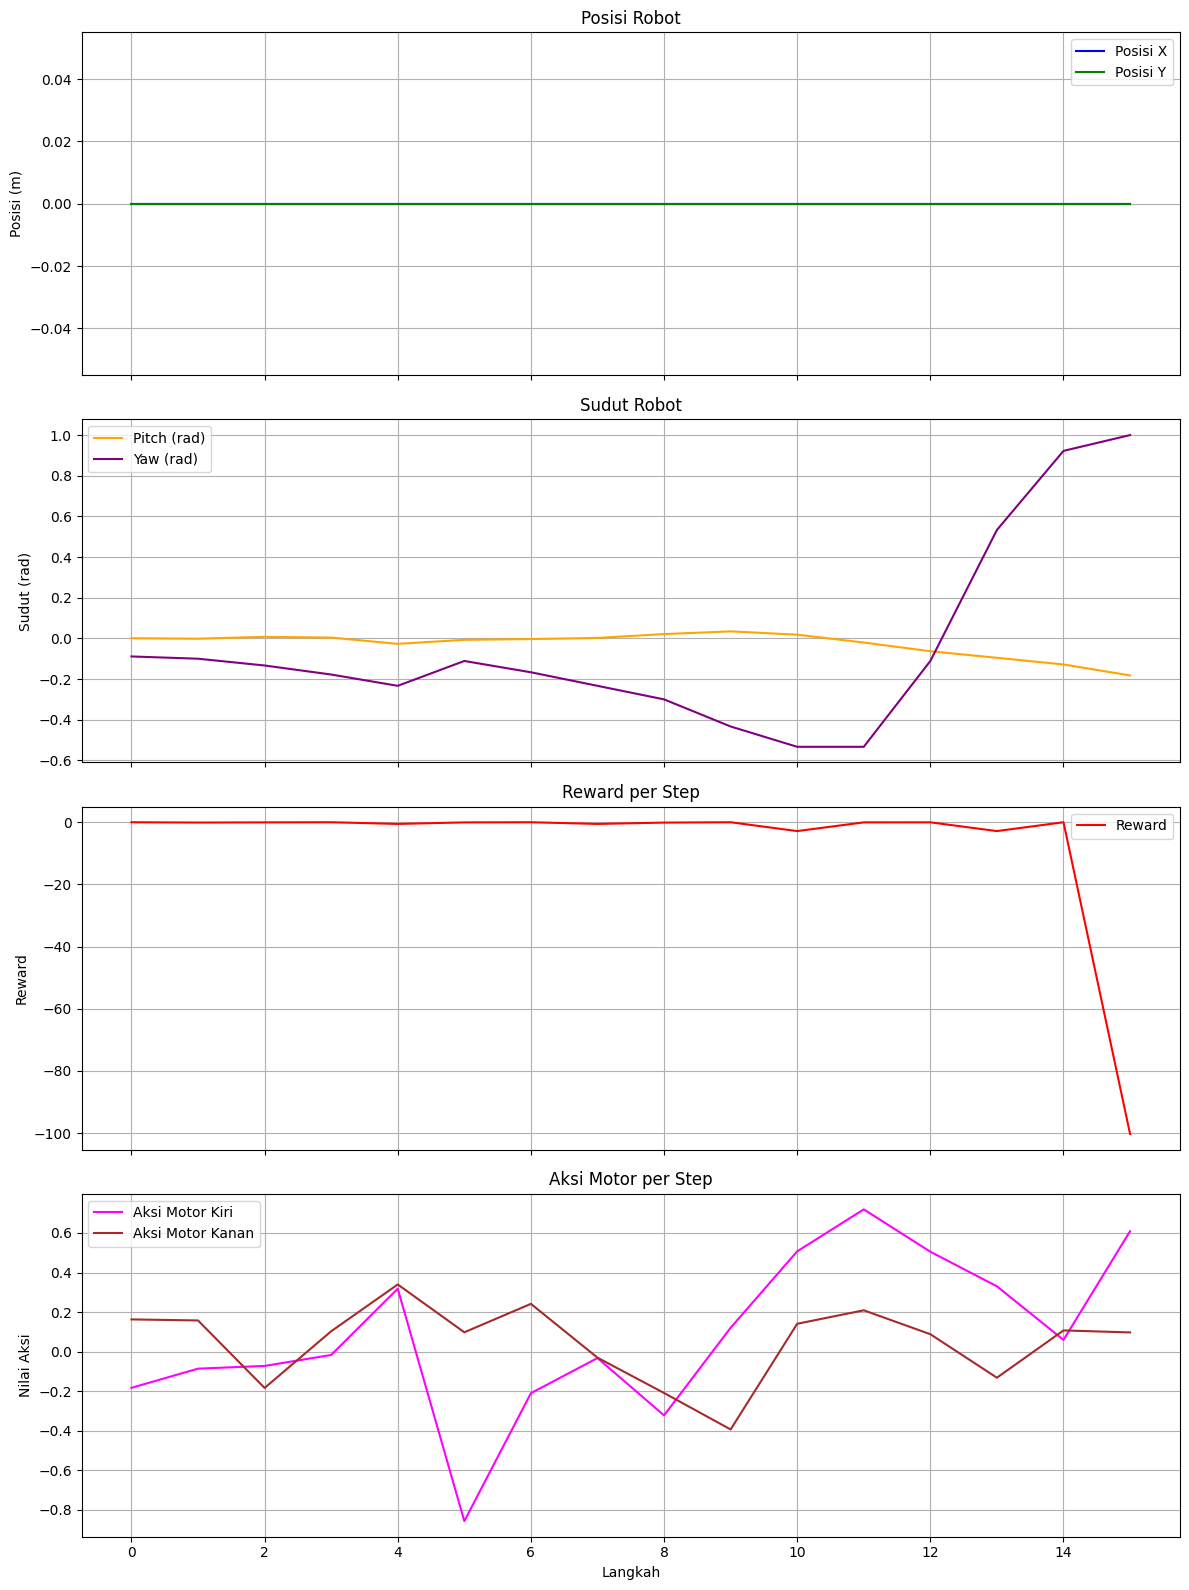

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from twsbr_env.envs import TwsbrEnv
from stable_baselines3 import SAC

def main():
    # Buat environment dengan target manual dan mode render human
    env = TwsbrEnv(
        render_mode="human",
        truncation_steps=5000,
    )
    
    # Reset environment untuk mendapatkan observasi awal
    obs, info = env.reset()
    
    # Muat model SAC yang sudah dilatih
    model = SAC.load("sac_twsbr.zip", env=env, device="cuda")
    
    print("Mulai inferensi satu episode. Tekan Ctrl+C untuk menghentikan lebih awal.")
    pos = [0, 0]
    # Data logging untuk plotting
    steps = []
    pos_x_list = []
    pos_y_list = []
    pitch_list = []
    yaw_list = []
    reward_list = []
    left_action_list = []
    right_action_list = []

    step = 0
    done = False
    while step < 100000:
        # Dapatkan aksi dari model (deterministic)
        action, _states = model.predict(obs, deterministic=True)
        
        # Lakukan step pada environment
        obs, reward, terminated, truncated, info = env.step(action)
        
        # Ambil data posisi dan sudut dari simulasi (gunakan method internal _get_current_state)
        target_pitch, target_speed, pitch, yaw, linear_speed, _, _, left_motor_power, right_motor_power, *_  = obs # pos: [x, y, z]
        
        # Simpan data
        steps.append(step)
        pos_x_list.append(pos[0])
        pos_y_list.append(pos[1])
        pitch_list.append(pitch)
        yaw_list.append(yaw)
        reward_list.append(reward)
        left_action_list.append(left_motor_power)
        right_action_list.append(right_motor_power)
        
        env.render()
        
        if terminated or truncated:
            print("Episode selesai.")
            break
        step += 1
    env.close()

    # Plot hasil: posisi, sudut, reward, dan aksi motor
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
    
    # Grafik posisi: plot x dan y terhadap step
    axs[0].plot(steps, pos_x_list, label="Posisi X", color='blue')
    axs[0].plot(steps, pos_y_list, label="Posisi Y", color='green')
    axs[0].set_ylabel("Posisi (m)")
    axs[0].set_title("Posisi Robot")
    axs[0].legend()
    axs[0].grid(True)
    
    # Grafik sudut: plot pitch dan yaw terhadap step
    axs[1].plot(steps, pitch_list, label="Pitch (rad)", color='orange')
    axs[1].plot(steps, yaw_list, label="Yaw (rad)", color='purple')
    axs[1].set_ylabel("Sudut (rad)")
    axs[1].set_title("Sudut Robot")
    axs[1].legend()
    axs[1].grid(True)
    
    # Grafik reward per step
    axs[2].plot(steps, reward_list, label="Reward", color='red')
    axs[2].set_ylabel("Reward")
    axs[2].set_title("Reward per Step")
    axs[2].legend()
    axs[2].grid(True)
    
    # Grafik aksi motor: left dan right
    axs[3].plot(steps, left_action_list, label="Aksi Motor Kiri", color='magenta')
    axs[3].plot(steps, right_action_list, label="Aksi Motor Kanan", color='brown')
    axs[3].set_ylabel("Nilai Aksi")
    axs[3].set_xlabel("Langkah")
    axs[3].set_title("Aksi Motor per Step")
    axs[3].legend()
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [1]:
# Example Usage (Optional)
if __name__ == '__main__':
    # --- Test Continuous Actions ---
    print("Testing Continuous Action Space...")
    #env_cont = TwsbrEnv(render_mode="human", action_type="continuous", truncation_steps=500)
    env_cont = gym.make('TwsbrEnv-v0', render_mode="human", action_type="continuous", truncation_steps=500)

    obs, info = env_cont.reset()
    print(f"Initial Observation Shape: {obs.shape}")
    print(f"Action Space: {env_cont.action_space}")
    terminated = False
    truncated = False
    total_reward_cont = 0
    step = 0
    while not terminated and not truncated:
        # Sample random continuous action [-1, 1]
        action = env_cont.action_space.sample()
        #action = np.array([0.5, 0.5]) # Example: Move forward slowly
        obs, reward, terminated, truncated, info = env_cont.step(action)
        total_reward_cont += reward
        step += 1
        if step % 100 == 0:
             print(f"Step: {step}, Reward: {reward:.4f}, Info: {info}")
             #print(f"Denormalized Obs: {env_cont.observation_denormalize(obs)}") # Denormalize full obs (22 elements)

    print(f"Continuous Test Done. Steps: {step}, Total Reward: {total_reward_cont:.4f}, Final Info: {info}")
    env_cont.close()
    print("-" * 30)


    # --- Test Discrete Actions ---
    print("\nTesting Discrete Action Space...")
    #env_disc = TwsbrEnv(render_mode="human", action_type="discrete", truncation_steps=500)
    env_disc = gym.make('TwsbrEnv-v0', render_mode="human", action_type="discrete", truncation_steps=500)

    obs, info = env_disc.reset()
    print(f"Initial Observation Shape: {obs.shape}")
    print(f"Action Space: {env_disc.action_space}")
    terminated = False
    truncated = False
    total_reward_disc = 0
    step = 0

    # Example: Calculate action index for specific velocities (e.g., +50% left, +50% right)
    # Find index corresponding to velocity closest to 0.5 * max_velocity
    target_vel = 0.5 * env_disc.max_velocity
    closest_vel_idx = np.abs(env_disc.discrete_velocity_options - target_vel).argmin()
    num_levels = len(env_disc.discrete_velocity_options)
    action_forward = closest_vel_idx * num_levels + closest_vel_idx # Left index * N + Right index


    while not terminated and not truncated:
        # Sample random discrete action index (0 to 440)
        #action = env_disc.action_space.sample()
        action = action_forward # Use pre-calculated action for forward movement

        obs, reward, terminated, truncated, info = env_disc.step(action)
        total_reward_disc += reward
        step += 1

        # Decode action for printing (optional)
        left_idx = action // num_levels
        right_idx = action % num_levels
        left_vel = env_disc.discrete_velocity_options[left_idx]
        right_vel = env_disc.discrete_velocity_options[right_idx]

        if step % 100 == 0:
            print(f"Step: {step}, Action: {action} (L:{left_vel:.1f}, R:{right_vel:.1f}), Reward: {reward:.4f}, Info: {info}")
            #print(f"Denormalized Obs (current): {env_disc.observation_denormalize(obs)[:11]}")


    print(f"Discrete Test Done. Steps: {step}, Total Reward: {total_reward_disc:.4f}, Final Info: {info}")
    env_disc.close()

Testing Continuous Action Space...


NameError: name 'gym' is not defined